In [2]:
import numpy as np
import pandas as pd
import os
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import time
import pygmo as pg
import math

In [3]:
dataset = pd.read_csv("Ackley_dataset_data.csv")
Ackley_dataset = dataset["val"].tolist()

In [4]:
D = 500
f_bias = -140
lower_bound = -32
upper_bound = 32

In [5]:
def func(x):
    Sum1 = 0
    Sum2 = 0
    for i in range(D - 1):
        z = x[i] - Ackley_dataset[i]
        Sum1 += z ** 2
        Sum2 += math.cos(2 * math.pi * z)
    func = -20 * math.exp(-0.2 * math.sqrt(Sum1 / D)) - math.exp(Sum2 / D) + 20 + math.e + f_bias
    return func

In [6]:
class ACK:
    def __init__(self,xmin,xmax,D,f_bias):
        self.lower_bound = xmin
        self.upper_bound = xmax
        self.dimension = D
        self.fitness_per_eval = []
        self.glob_opt = f_bias

    def fitness(self, x):
        #result = abs(func(x)-f_bias)
        result = func(x)
        return [result]

    def get_bounds(self):
        x_min = self.lower_bound * np.ones(self.dimension)
        x_max = self.upper_bound * np.ones(self.dimension)
        return x_min, x_max

In [7]:
def compute(func):
    global curve
    global start_time
    global end_time
    gen=20000
    start_time = time.time()
    algo = pg.algorithm(pg.de(gen=gen,F=0.6,CR=0.95,variant=3,ftol=0,xtol=1e-5))
    algo.set_verbosity(100)
    popsize = 100
    prob = pg.problem(ACK(lower_bound,upper_bound,D,f_bias))
    pop = pg.population(prob, popsize)
    extract_algo = algo.extract(pg.de)
    pop = algo.evolve(pop)
    end_time = time.time()
    
    log = extract_algo.get_log()
    niter = pop.problem.get_fevals()
    
    curve = [x[2] for x in log]
    print("Best position: ", pop.champion_x)
    print("Best Fitness",pop.champion_f[0])

In [8]:
compute(func)

Best position:  [ 27.00775711 -16.13168919   6.41055501  -0.84105188  23.47793797
  15.72580998  -2.61194009 -28.88978141  19.28442986  -3.31779814
   6.92594089  17.51622225  25.30877824  14.29243475 -19.42403133
  -5.65762722  26.12818195  25.01426639  -5.38378758  23.61897185
 -26.52652171  -8.82791207  18.78998984 -29.40832196 -21.66654708
 -17.83408689 -18.07669544   6.22754875 -13.6687245  -18.07114393
 -29.08356438  14.80714059  -3.29421406  25.90887471  -2.0403395
  -4.88103194  20.77328507   1.50914978 -17.84115854  10.32824811
  20.2871067  -28.82162917  10.87662968  -7.23113892  19.90776106
   0.16877304  12.56828356  -4.26645808 -11.72295799 -18.62077515
 -18.39413062  10.93339342 -11.83413595   2.50043123 -20.94762143
  11.87390891  -7.29761997  21.60069629  21.21930784   5.61377475
  -0.20685302  23.98615051  19.29774964   8.69462305  19.07846045
   9.61365339  -9.4817629  -12.61644625  -9.52838584   2.04474106
  13.62679302 -11.44259041  20.3097627    4.08434766  -7.7751

In [9]:
comp_time = end_time-start_time
comp_time

1214.4103207588196

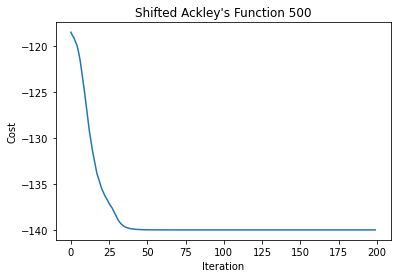

In [10]:
plt.plot(curve)
plt.title("Shifted Ackley's Function 500")
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.show()